# Importación de librerías y carga de datos

In [22]:
"""
# LA ÚLTIMA CELDA GUARDA EL MODELO ENTRENADO !!!!!!!!!

Modulo de entrenamiento para diferentes pipelines de ML para el
entrenamiento utilizando los datasets creados. El flujo es capaz de 
generalizar en la mayoría de los casos y únicamente es necesario
realizar modificaciones en la ruta a los datos.

"""
import os
import pandas as pd 
import seaborn as sns                                                   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import pickle


path=r'C:\Users\santi\Desktop\Informatica_medica\Practicas\Final_project_ML\data'

In [23]:
data = pd.read_csv(os.path.join(path,'dataV1_NoAgrupados.csv'),sep=',')

In [24]:
data

,DESCRIPCION,Mes,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Minutos (Camara - F3),Dx Principal Tipo,Paciente Edad,Paciente Sexo,Clasificacion 1 Triaje \r\nEnfermeria,Modalidad Atencion,...,B200,D509,Q210,H521,E160,S064,M546,T250,F29X,J450
0,1,2.634,0,48,26.633333,1,75.0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2.634,1,5,65.133333,0,61.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.634,1,65,82.050000,0,62.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2.634,0,48,0.000000,0,78.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.634,0,1,116.850000,0,73.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28782,1,1.634,1,53,70.583333,0,23.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
28783,1,1.634,1,48,42.500000,0,49.0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
28784,1,1.634,1,65,50.133333,0,43.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
28785,1,1.634,1,18,40.900000,0,54.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print(f'sujetos: {data.shape[0]} | caracteristicas: {data.shape[1]}')

sujetos: 28787 | caracteristicas: 2430


# Preprocesamiento

In [26]:
# Se reorganiza la columna, para ponerla al final

target = data.pop('Tipo Egreso (INTERNACION)')
data.insert(len(data.columns), target.name, target)

### Creación de datasets de entrenamiento y test

In [27]:
X = data.values[:,:-1].astype(float)
y = data.values[:,-1].astype(float)
print(X.shape)
print(y.shape)

(28787, 2429)
(28787,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(                            
    X, # Valores de X
    y, # Valores de Y
    test_size=0.1, # Test de 10% debido a que la validación cruzada se hace con el train set
    random_state=1, # Semilla
    stratify=data.values[:,-1]) # que se mantenga la proporcion en la división

In [29]:
print(f'tamaño del dataset de entrenamiento: {X_train.shape[0]}')
print(f'tamaño del dataset de test: {X_test.shape[0]}')

tamaño del dataset de entrenamiento: 25908
tamaño del dataset de test: 2879


## Multi Layer perceptron

In [35]:
param_distributions = {
    'hidden_layer_sizes': [(4,2),(5,2), (2,2)],  # probar diferentes arquitecturas de capas ocultas
    'activation': ['logistic', 'relu'],  # función de activación
    'solver': ['sgd', 'adam'],  # algoritmo de optimización
    'learning_rate': ['constant','adaptive'],  # tasa de aprendizaje
}
mlp = MLPClassifier(max_iter=100)
random_search = RandomizedSearchCV(estimator=mlp,
                                    param_distributions=param_distributions,
                                    n_iter=10,
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=5,
                                    random_state=42,
                                    return_train_score=True,
                                    scoring=['accuracy','precision'],
                                    refit='accuracy')


random_search.fit(X_train, y_train)
print("Mejores parámetros encontrados por RandomizedSearchCV:")
print(random_search.best_params_)
print("Mejor puntuación encontrada por RandomizedSearchCV:")
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros encontrados por RandomizedSearchCV:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (2, 2), 'activation': 'logistic'}
Mejor puntuación encontrada por RandomizedSearchCV:
0.7851243793658375


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
results = pd.DataFrame(random_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_learning_rate,param_hidden_layer_sizes,param_activation,params,split0_test_accuracy,...,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,89.835723,4.444249,0.131170,0.011285,sgd,constant,"(2, 2)",logistic,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.727711,...,0.730264,0.043762,6,0.757640,0.741187,0.652851,0.730668,0.755136,0.727496,0.038580
1,70.675411,37.380848,0.138494,0.008011,sgd,constant,"(5, 2)",relu,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.511386,...,0.617551,0.087493,9,0.511387,0.511387,0.711642,0.694800,0.704296,0.626702,0.094306
2,106.137580,3.281924,0.154192,0.012138,sgd,constant,"(4, 2)",logistic,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.724624,...,0.730165,0.015728,7,0.751882,0.721755,0.723774,0.729353,0.726623,0.730677,0.010910
3,109.222356,3.550358,0.145783,0.008180,sgd,adaptive,"(5, 2)",relu,"{'solver': 'sgd', 'learning_rate': 'adaptive',...",0.735623,...,0.688306,0.042577,8,0.709329,0.715636,0.674164,0.733613,0.619065,0.690361,0.040534
4,94.141823,3.392525,0.130033,0.013215,adam,adaptive,"(2, 2)",logistic,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.786955,...,0.776181,0.010605,1,0.821912,0.810970,0.795572,0.814230,0.829575,0.814452,0.011428
5,96.809134,2.218701,0.120525,0.011291,adam,constant,"(2, 2)",logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.785025,...,0.765085,0.021457,4,0.817263,0.806011,0.824074,0.809537,0.761946,0.803766,0.021826
6,56.202108,37.204789,0.142648,0.014544,adam,constant,"(4, 2)",relu,"{'solver': 'adam', 'learning_rate': 'constant'...",0.786376,...,0.610938,0.122083,10,0.801231,0.511387,0.511387,0.511362,0.788954,0.624864,0.139045
7,102.378125,2.459631,0.101512,0.017657,adam,constant,"(4, 2)",logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.782902,...,0.768605,0.021547,3,0.839073,0.838030,0.810184,0.807803,0.779202,0.814858,0.022209
8,88.178006,2.699216,0.085105,0.008541,adam,constant,"(2, 2)",relu,"{'solver': 'adam', 'learning_rate': 'constant'...",0.785411,...,0.762774,0.008112,5,0.819347,0.796599,0.801769,0.791949,0.798938,0.801720,0.009383
9,93.388498,1.336244,0.060714,0.008308,adam,constant,"(5, 2)",logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.786183,...,0.773769,0.013781,2,0.821611,0.844651,0.810912,0.821167,0.810216,0.821712,0.012452


In [38]:
results[results['rank_test_accuracy']==1].T

,4
mean_fit_time,94.141823
std_fit_time,3.392525
mean_score_time,0.130033
std_score_time,0.013215
param_solver,adam
param_learning_rate,adaptive
param_hidden_layer_sizes,"(2, 2)"
param_activation,logistic
params,"{'solver': 'adam', 'learning_rate': 'adaptive'..."
split0_test_accuracy,0.786955


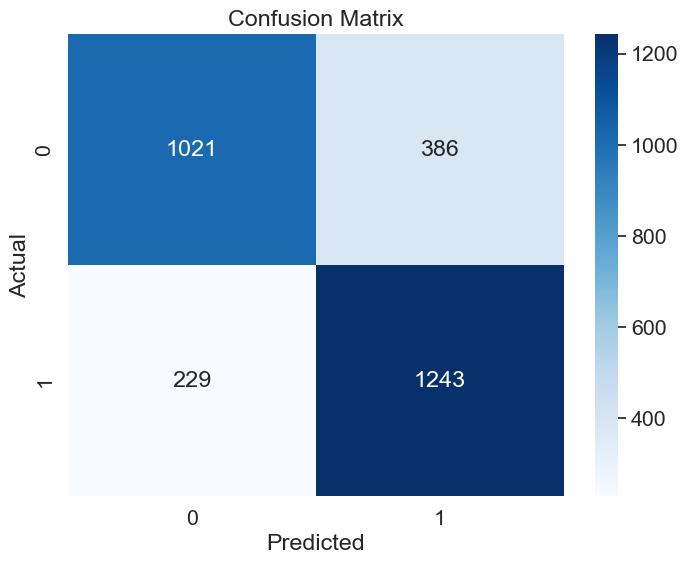

In [37]:
y_pred = random_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajustar el tamaño de la fuente
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Nombre del directorio y del archivo
nombre_dir = 'models'
model_name = 'MLP_RSearchCV.pkl'

# Crear el directorio si no existe
if not os.path.exists(nombre_dir):
    os.makedirs(nombre_dir)

# Crear la ruta completa del archivo
path = os.path.join(nombre_dir, model_name)

# Guardar el DataFrame en formato CSV
pickle.dump(random_search.best_estimator_, open(path, 'wb'))